# Módulo 06 aula 05

Gráficos de barras com duas entradas.

- sns.countplot()
- sns.catplot()
- df.crosstab()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<Axes: xlabel='day', ylabel='count'>

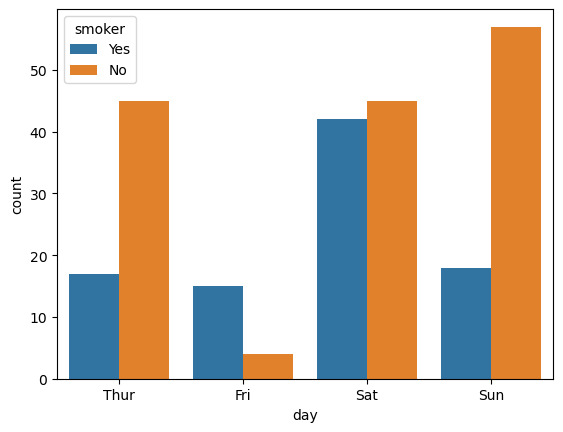

In [3]:
# Distribuição de fumantes e não fumantes por dia
sns.countplot(x='day'
              , hue = 'smoker'
              , data=tips[tips.tip_pct < 1]
             )

<Axes: xlabel='smoker', ylabel='count'>

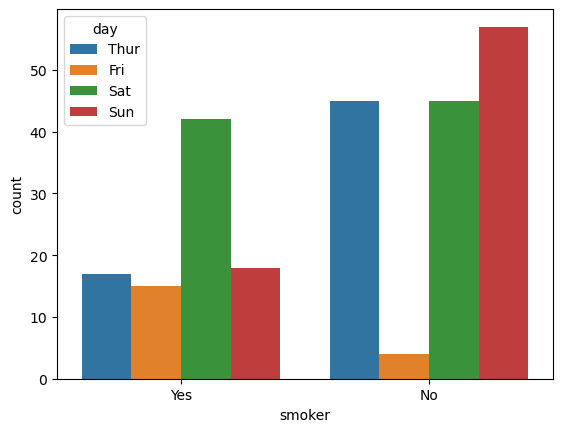

In [4]:
# Distribuição de fumantes e não fumantes por dia
sns.countplot(x='smoker'
              , hue = 'day'
              , data=tips[tips.tip_pct < 1]
             )

In [5]:
# Tabela cruzada
freq = pd.crosstab(tips['smoker'], tips['day'])
freq

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


In [6]:
freq.sum(axis = 1)

smoker
Yes     93
No     151
dtype: int64

In [7]:
# Fumantes e não fumantes preferem que dia da semana?
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin


day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,0.182796,0.16129,0.451613,0.204301
No,0.298013,0.02649,0.298013,0.377483


In [8]:
freq_pctlin.sum(axis = 1)

smoker
Yes    1.0
No     1.0
dtype: float64

countplot    
catplot / factorplot

<Axes: xlabel='smoker'>

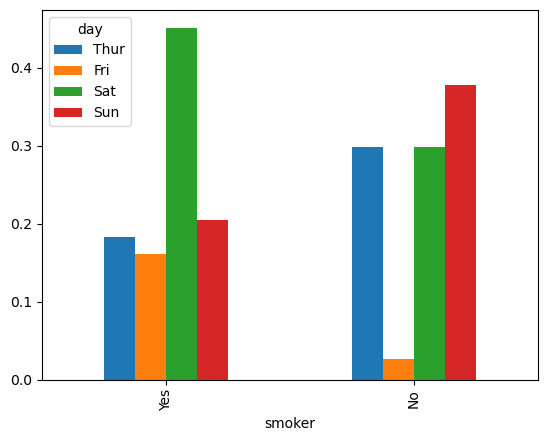

In [9]:
freq_pctlin.plot.bar()

smoker  Yes  No
day            
Thur     17  45
Fri      15   4
Sat      42  45
Sun      19  57
day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64
smoker       Yes        No
day                       
Thur    0.274194  0.725806
Fri     0.789474  0.210526
Sat     0.482759  0.517241
Sun     0.250000  0.750000


<Axes: xlabel='day'>

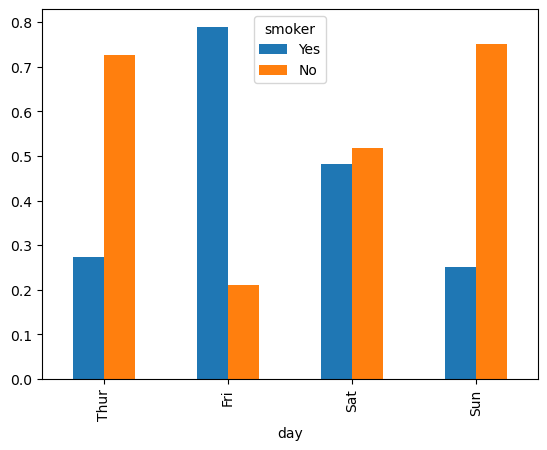

In [10]:
# Que dia da semana tem maior porcentual de fumantes?
freq = pd.crosstab(tips['day'], tips['smoker'])
print(freq)
print(freq.sum(1))

freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
print(freq_pctlin)

freq_pctlin.plot.bar()

### Função catplot do Seaborn

O Catplot é o novo nome da função barplot. Essa função traz diversos recursos para realizar gráficos de barras dentre outros. Verifique a [documentação](https://seaborn.pydata.org/generated/seaborn.catplot.html).

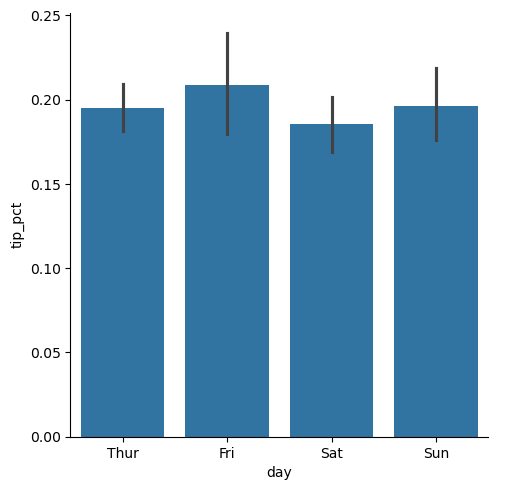

In [11]:
# Em que dia da semana o percentual de gorjeta é maior?
sns.catplot(x='day'
            , y='tip_pct'
            , kind='bar'
            , data=tips[tips.tip_pct < 1]
           )

C:\Users\hfasa\AppData\Local\Temp\ipykernel_13228\2975100030.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='day', y='total_bill'


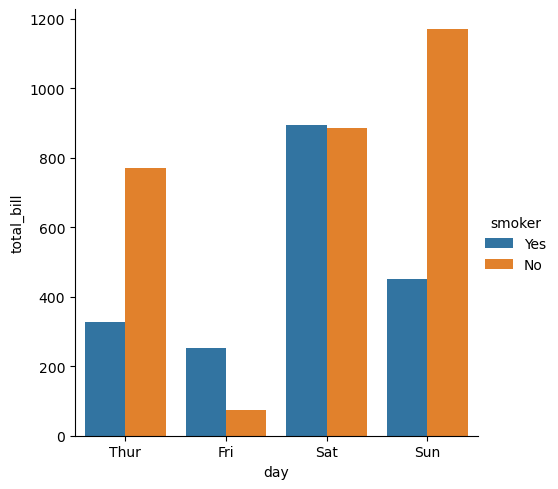

In [12]:
# Em que dia da semana fumantes consomem mais?
sns.catplot(x='day', y='total_bill'
            , hue = 'smoker'
            , kind='bar'
            , estimator = sum
            , data=tips[tips.tip_pct < 1]
            , ci = None
           )

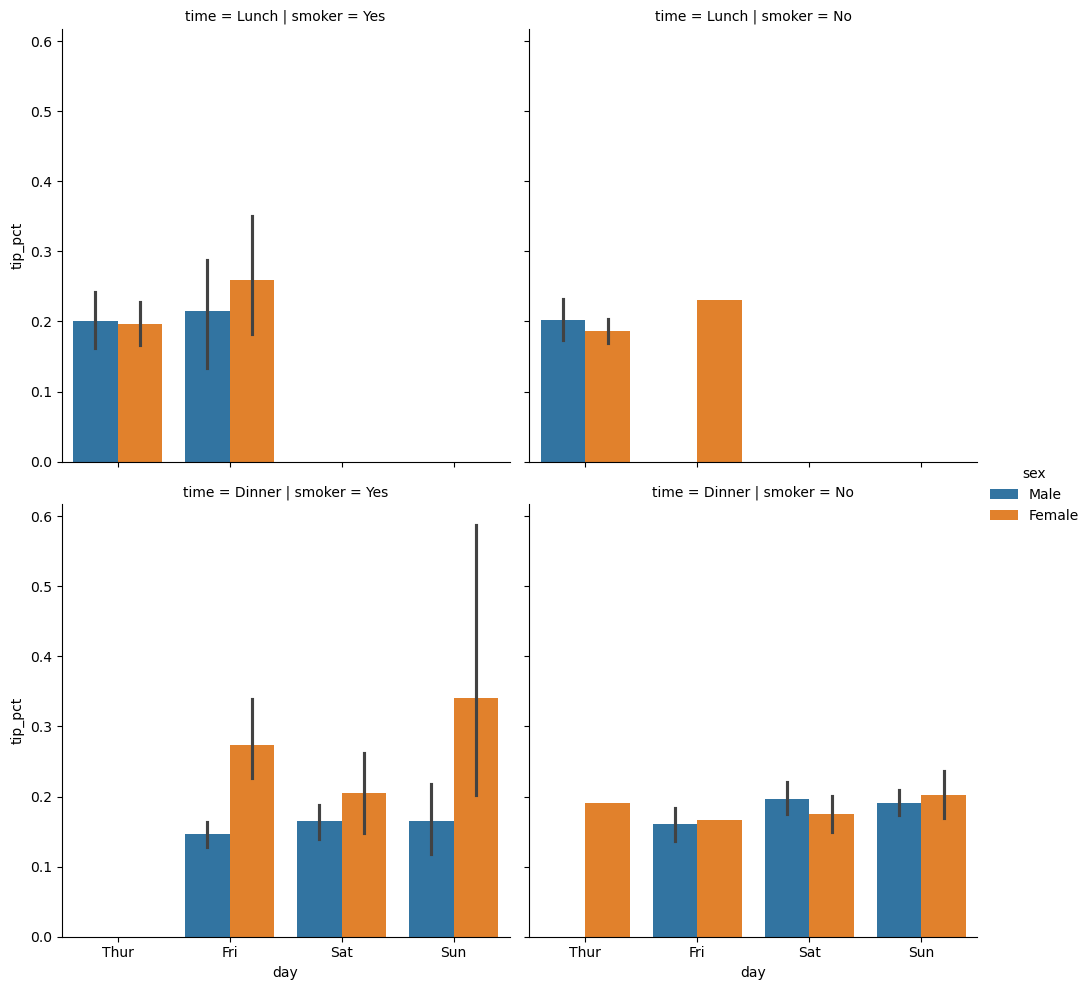

In [13]:
# Fazendo uma grade de gráficos
sns.catplot(x='day', y='tip_pct'
            , row='time'
            , col='smoker'
            , hue = 'sex'
            , kind='bar'
            , data=tips[tips.tip_pct < 1]
           )